# Using Machine Learning Tools Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The main aims of the prac are: 

- to practice using tools for loading and viewing data sets;
- to visualise data in several ways and check for common pitfalls;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant although do not use ones which directly relate to these questions with this dataset (which would normally only be found in someone else's assignment answers). If you take a large portion of code or text from the internet then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (20%)

Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

In [2]:
### Your code here
bikedata=pd.read_csv("SeoulBikeData.csv")
bikedata.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday,Yes


In [3]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
bikedata.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8760.000000,8759.000000,8760.000000
mean,704.602055,11.502740,12.914361,58.240183,1.953237,1436.442808,4.074369,0.569111
std,644.997468,6.922779,12.347109,20.584774,21.376612,608.827735,13.061011,0.868746
min,0.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,939.500000,-4.700000,0.000000
50%,504.500000,12.000000,13.700000,57.000000,1.500000,1697.500000,5.100000,0.010000
75%,1065.250000,18.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


### 1.2 Initial visualisation

To get a feeling for the data it is a good idea to do some form of simple visualisation.  **Display a set of histograms for the features** as they are right now, prior to any cleaning steps.

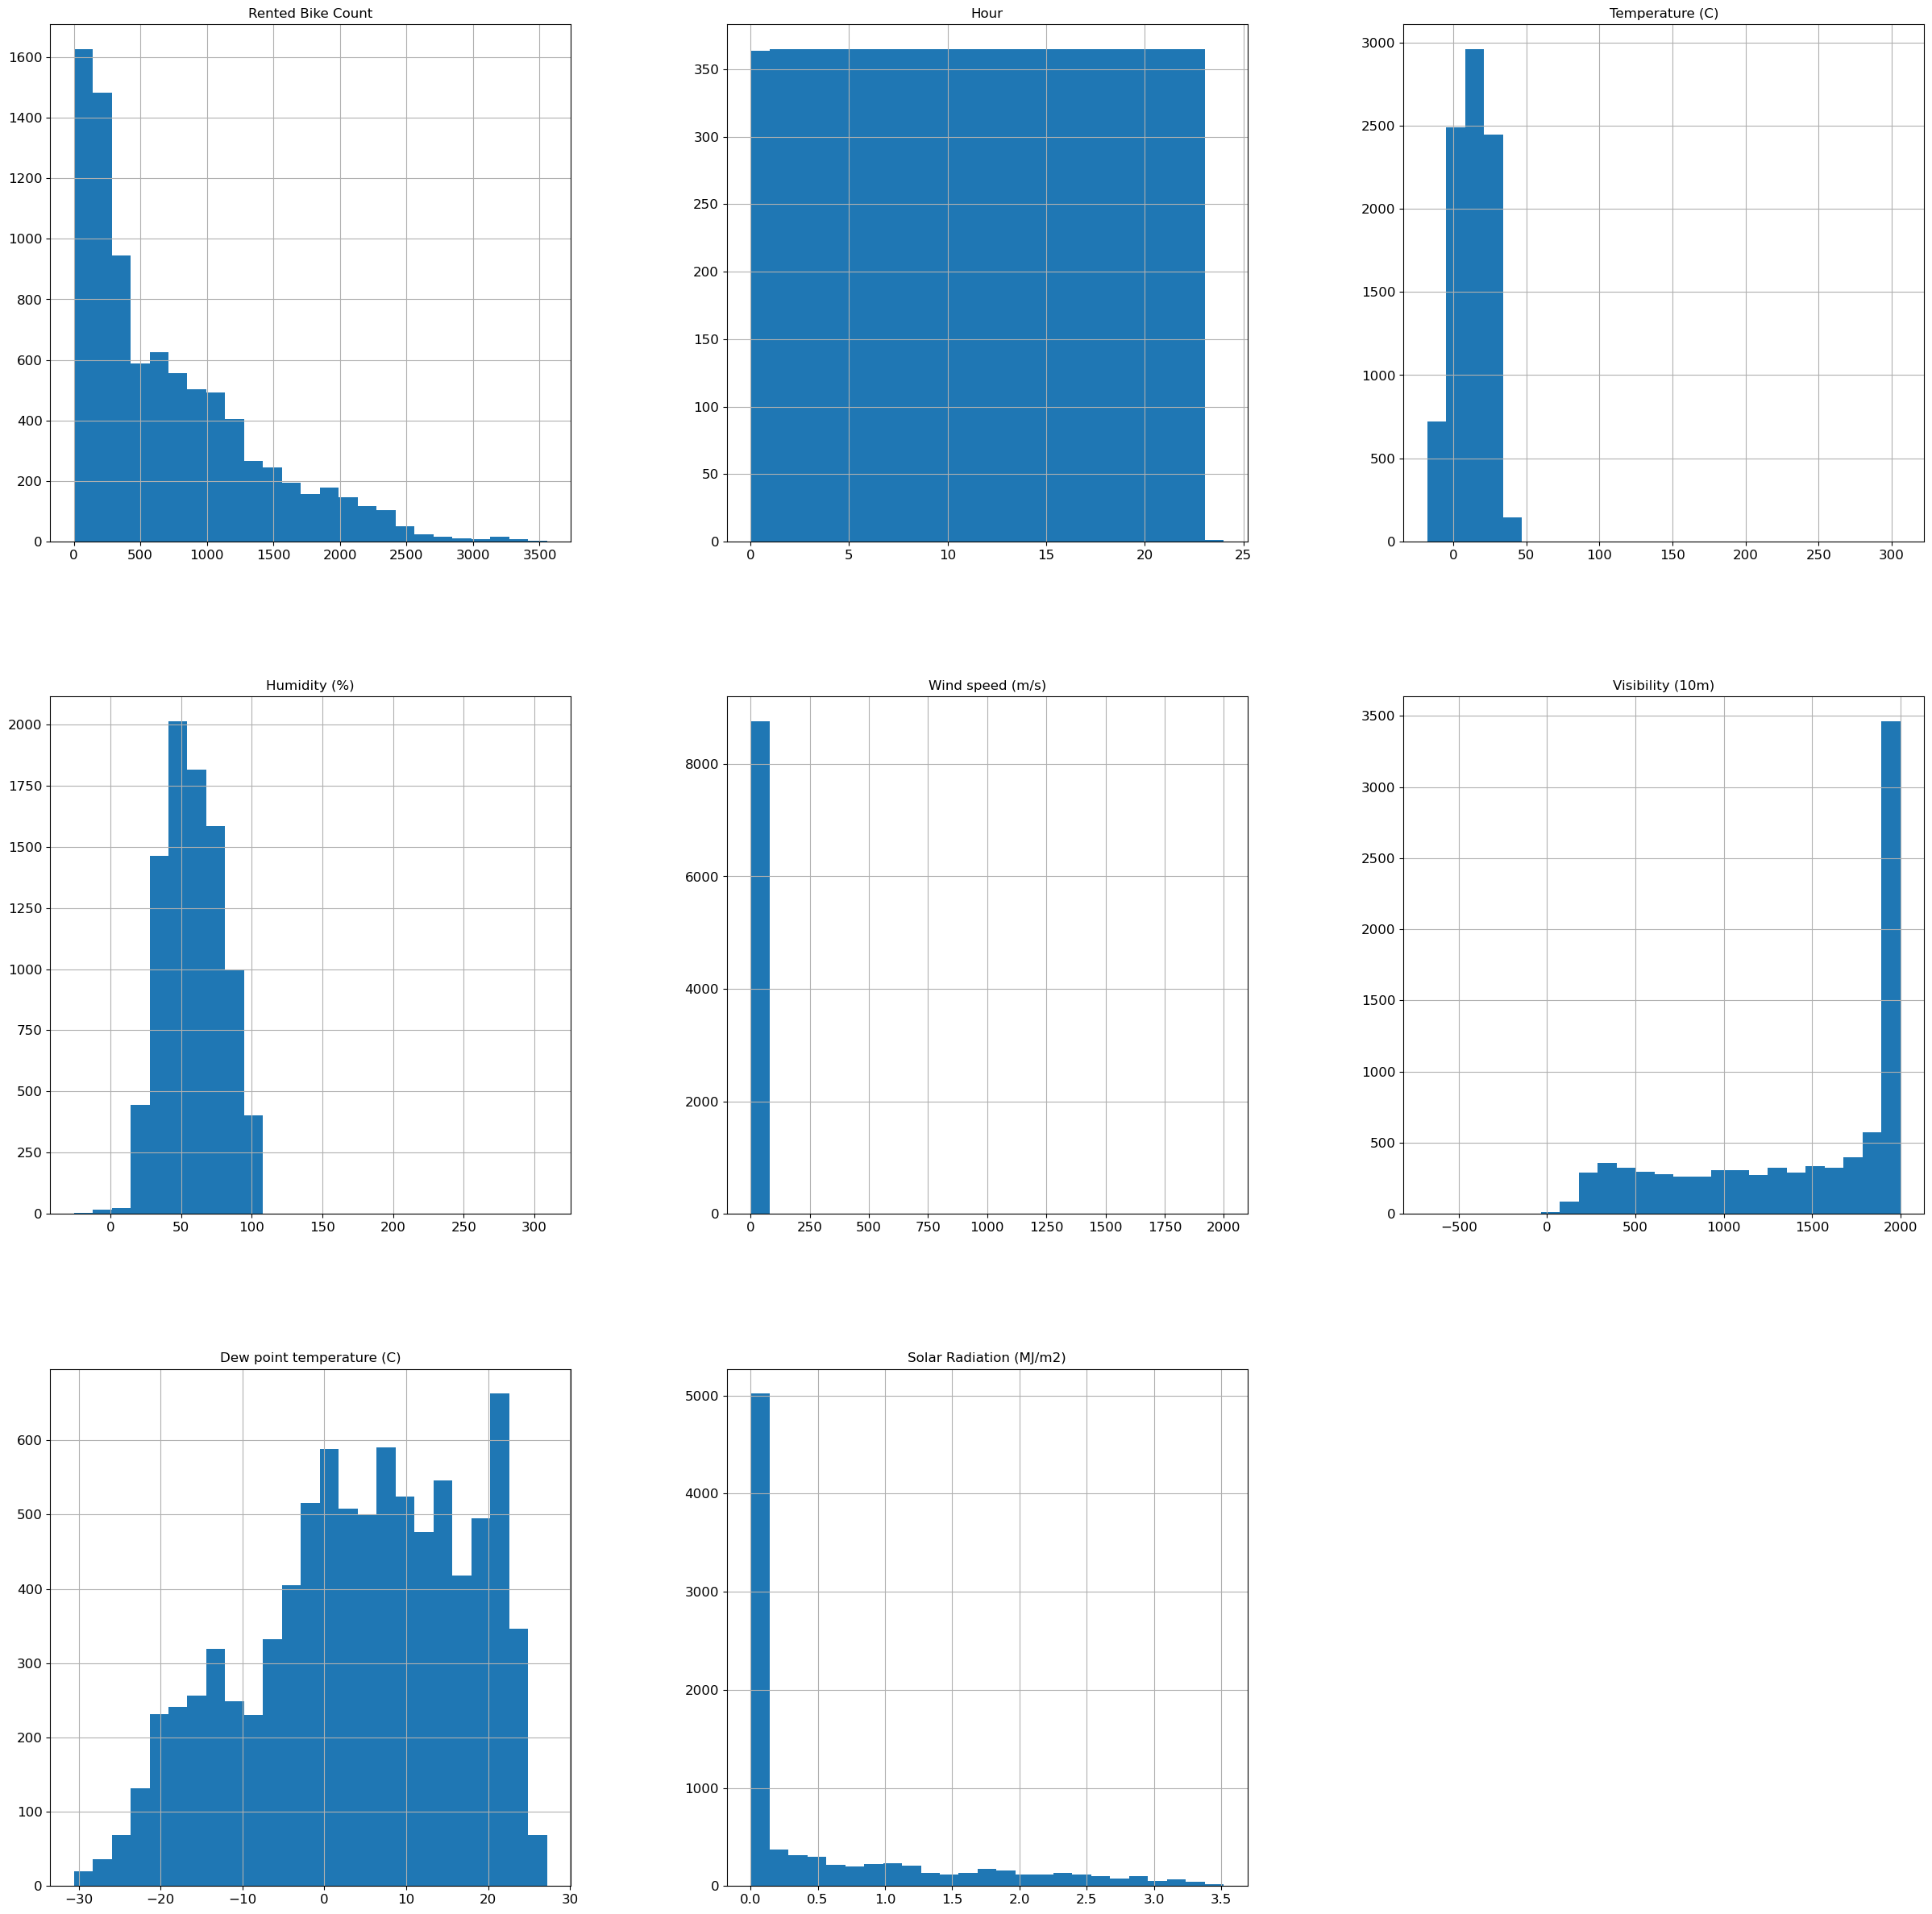

In [5]:
### Your code here
initdiam=bikedata.hist(bins=25, figsize=(30, 30))

### 1.3 Removing unwanted information

The "Functioning day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so **remove rows from the DataFrame where the business is closed.** Hint: you can use the `DataFrame.loc()` function to do this. As a sanity check, ensure that the rows you are removing contain zero bike rentals! **After doing this, delete the Functioning Day feature from the DataFrame** and verify that this worked.

In [6]:
### Your code here
bikedata=bikedata.loc[(bikedata['Functioning Day']!='No')&(bikedata['Rented Bike Count']!=0)]
bikedata = bikedata.drop(["Functioning Day"],axis = 1)

In [7]:
bikedata.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8465.000000,8465.000000,8465.000000,8465.000000,8464.000000,8465.000000,8464.000000,8465.000000
mean,729.156999,11.509864,12.803591,58.161607,1.962169,1433.477141,3.945558,0.567868
std,642.351166,6.921101,12.515429,20.713601,21.744979,609.596083,13.243081,0.868245
min,2.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1689.000000,4.700000,0.010000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


### 1.4 Numerical encoding

The main task is to predict future bike rental demand from this data. Hence the target feature is "Bike Rental Count". You will use regression techniques to do this, but this requires that the other features are numerical.

The Holiday and Season features both need to be converted to a simple numerical format. **Write code to convert the Holiday feature to 0 or 1 from its current format.** 

In [8]:
### Your code here
bikedata['Holiday']=bikedata['Holiday'].map({'Holiday':1,'No Holiday':0})

In [9]:
bikedata.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,0


The Season feature is a little tricker. A number could be assigned to each season, but a better solution in this case is to **add 4 new columns**, each labelled by a season, and each storing 0 or 1 according to the season in each row. In other words, the "Winter" column contains 1 whenever the season is winter, and 0 elsewhere. **Do this for each season. Afterwards, remember to delete the Season feature.**

In [10]:
### Your code here
bikedata['spring']=0
bikedata['summer']=0
bikedata['autumn']=0
bikedata['winter']=0
bikedata.loc[bikedata['Seasons']=='Spring','spring']=1
bikedata.loc[bikedata['Seasons']=='Summer','summer']=1
bikedata.loc[bikedata['Seasons']=='Autumn','autumn']=1
bikedata.loc[bikedata['Seasons']=='Winter','winter']=1
bikedata = bikedata.drop(["Seasons"],axis = 1)

In [11]:
bikedata.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,spring,summer,autumn,winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0,0,0,1


It is known that bike rentals depend strongly on whether it's a weekday or a weekend. **Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday.**  To do this, use the function `date_is_weekday` below, which returns 1 if it is a weekday and 0 if it is a weekend.

**Apply the function to the Date column in your DataFrame** (you can use `DataFrame.transform` to apply it).

In [12]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

### Your code to apply the function here:
bikedata['Date']=bikedata['Date'].transform(date_is_weekday)

In [13]:
bikedata.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,spring,summer,autumn,winter
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0,0,0,1
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0,0,0,1
2,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0,0,0,1
3,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0,0,0,1
4,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0,0,0,1


**Convert all the remaining data to numerical format**, with any non-numerical entries set to NaN.

In [14]:
### Your code here
bikedata = bikedata.apply(pd.to_numeric, errors='coerce')

In [15]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   int64  
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8440 non-null   float64
 10  Snowfall (cm)              8442 non-null   float64
 11  Holiday                    8465 non-null   int64  
 12  spring                     8465 non-null   int64  
 13  summer                     8465 non-null   int64

## Step 2: Visualise the data and perform further processing (20%)

### 2.1 Visualisation

Use **at least two graphical methods to display your data** and **identify** problematic entries. **Write one sentence** that summarises what you found about problematic entries.

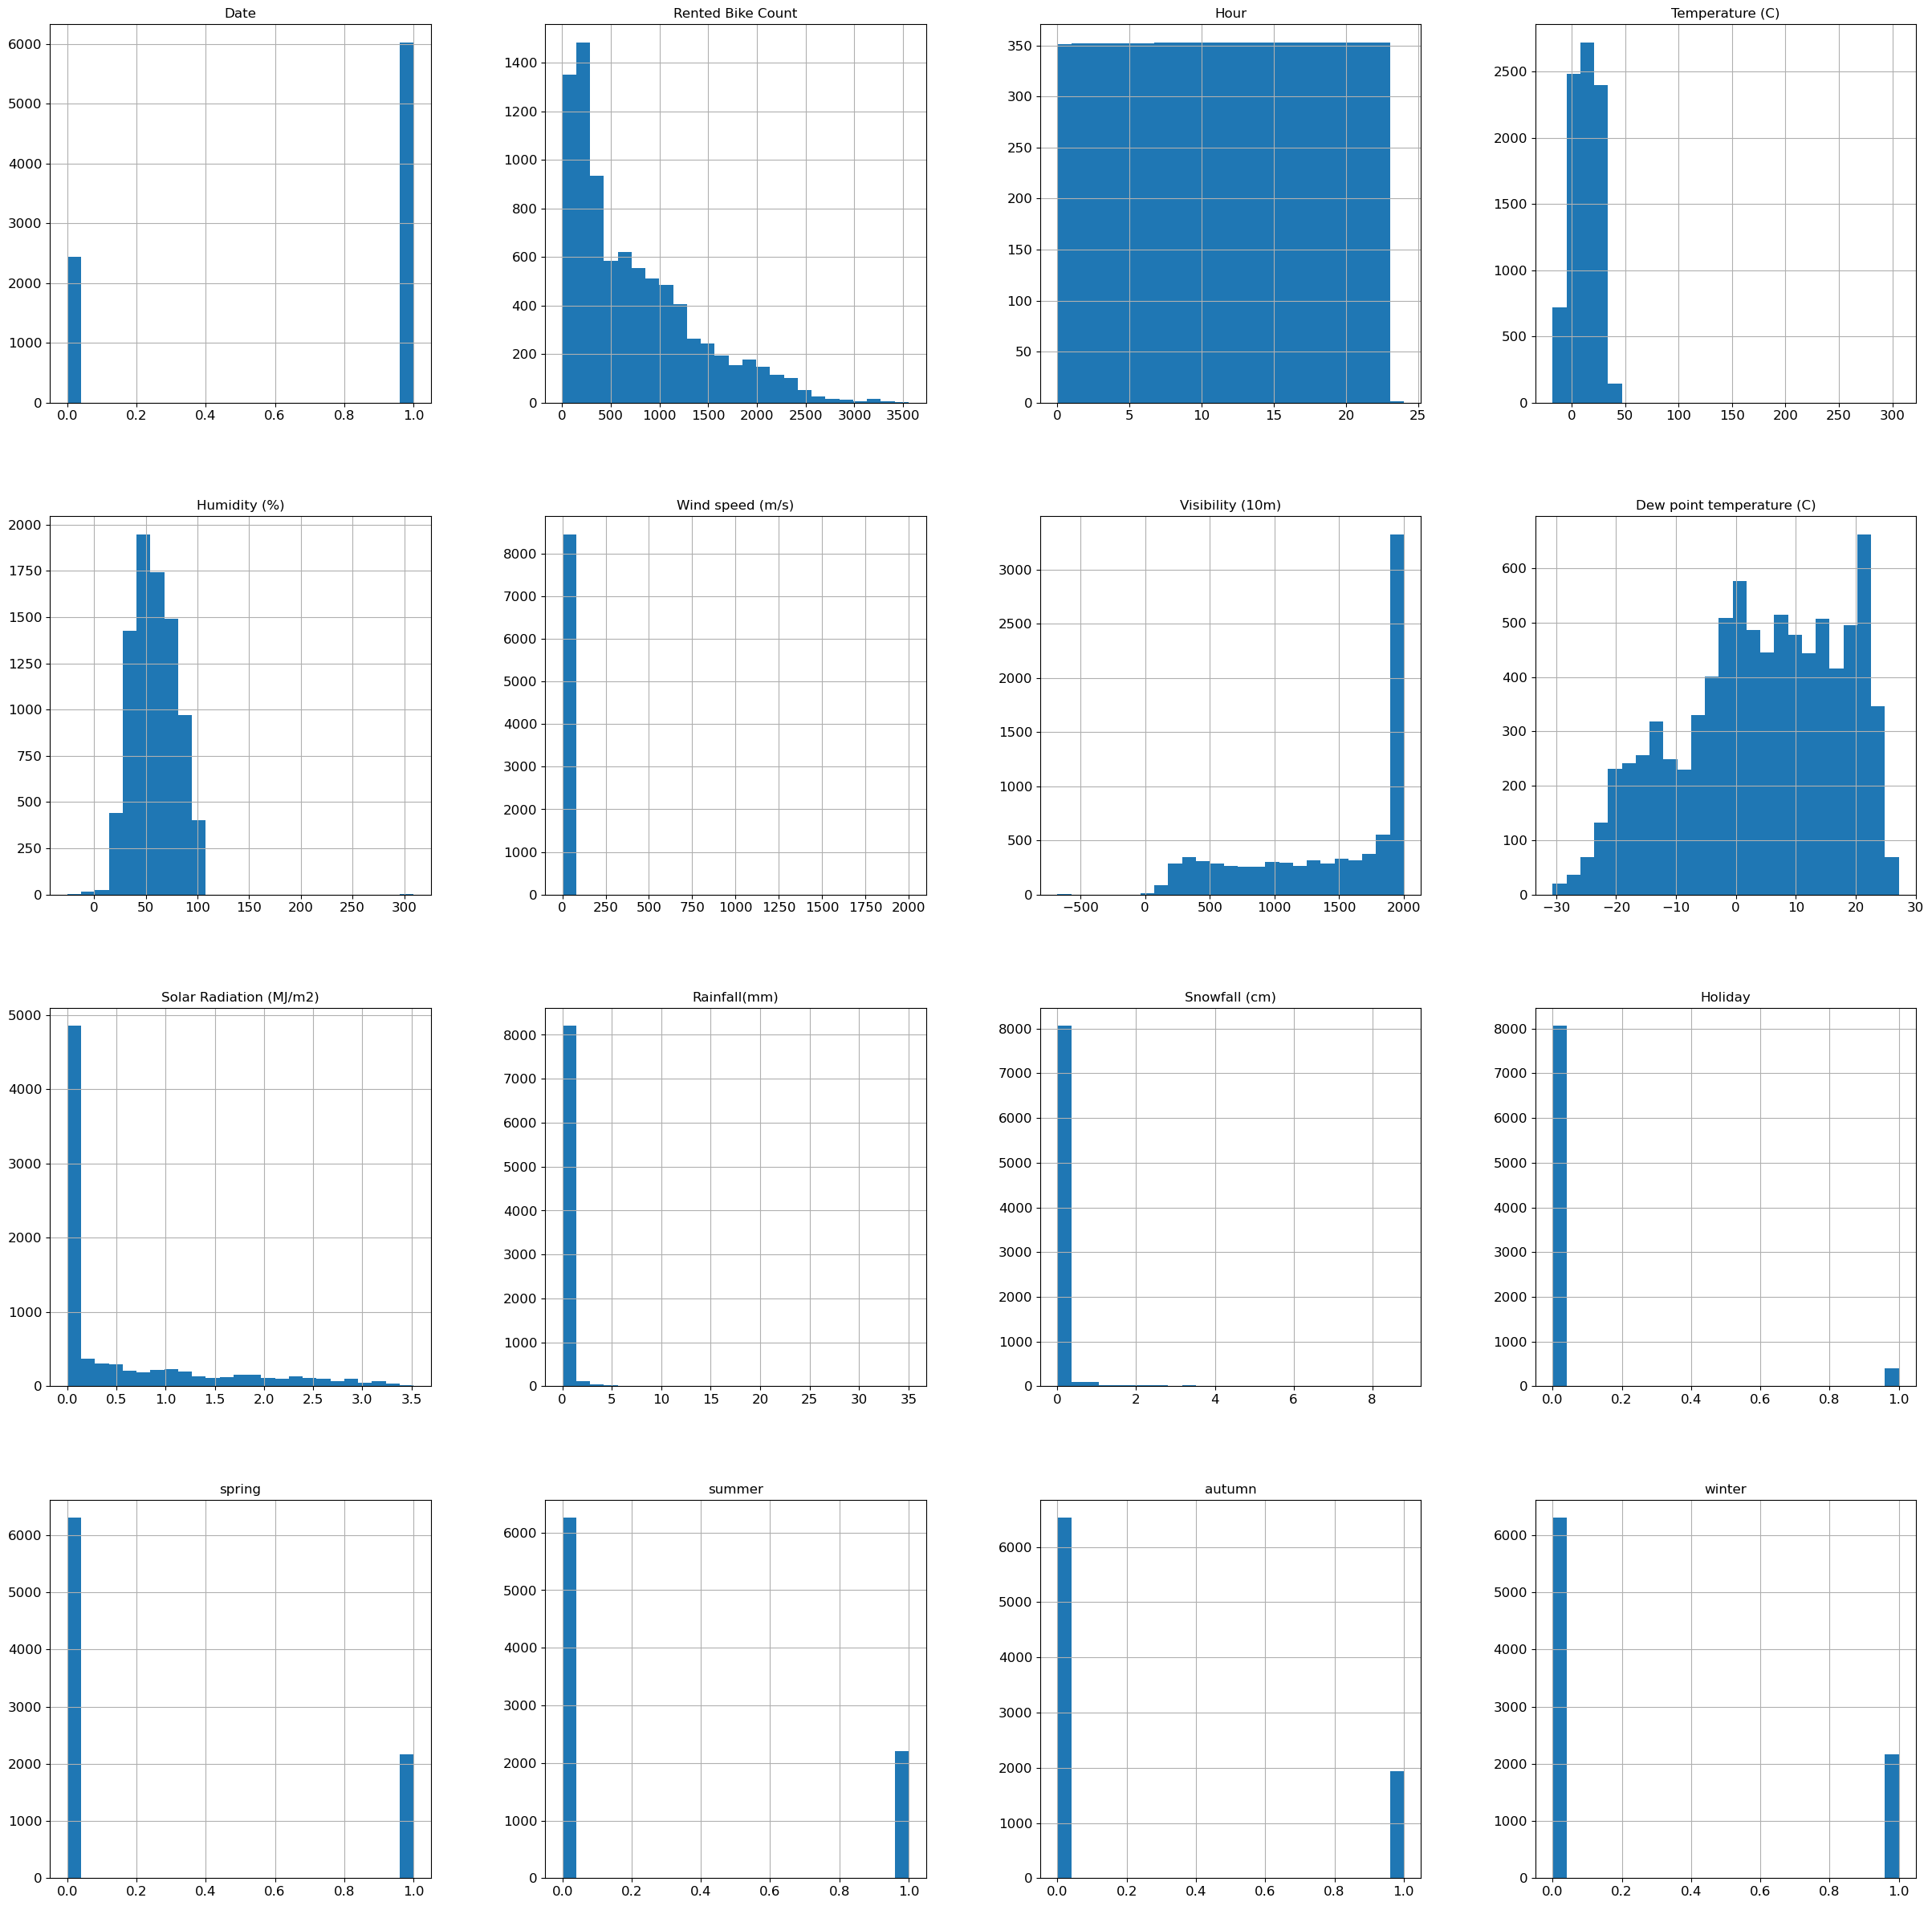

In [16]:
### Your code here
diam1=bikedata.hist(bins=25, figsize=(30, 30))

Date: [0 0 0 ... 1 1 1]


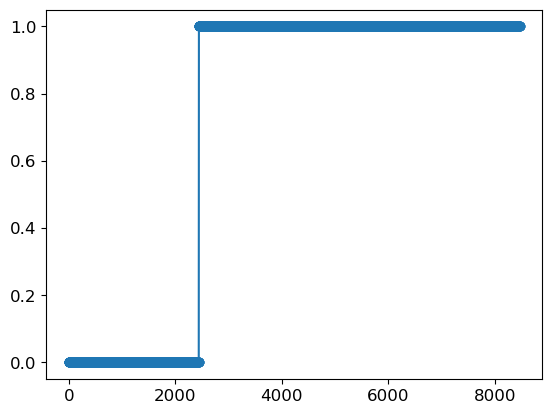

Rented Bike Count: [   2    2    2 ... 3404 3418 3556]


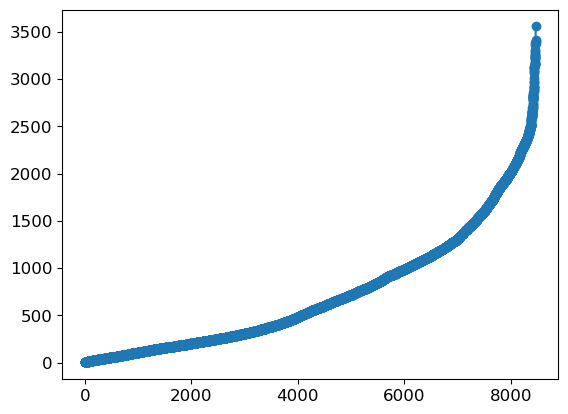

Hour: [ 0  0  0 ... 23 23 24]


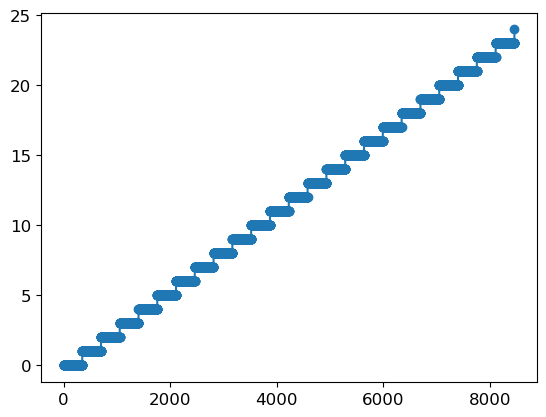

Temperature (C): [-17.8 -17.5 -17.5 ...  39.3  39.4 306. ]


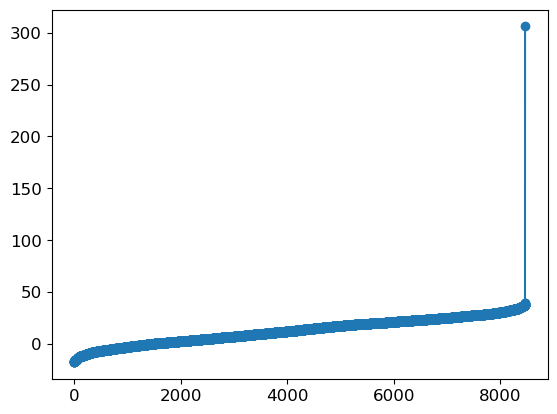

Humidity (%): [-26 -24 -24 ...  98  98 309]


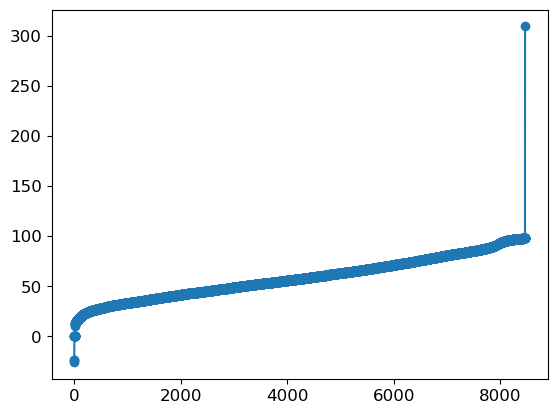

Wind speed (m/s): [   0.     0.     0.  ...    7.4 2000.     nan]


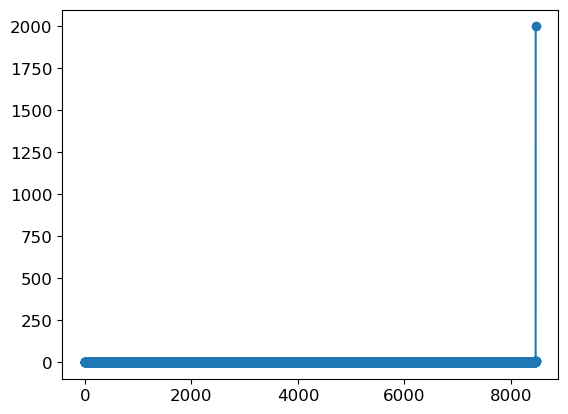

Visibility (10m): [-678    1   27 ... 2000 2000 2000]


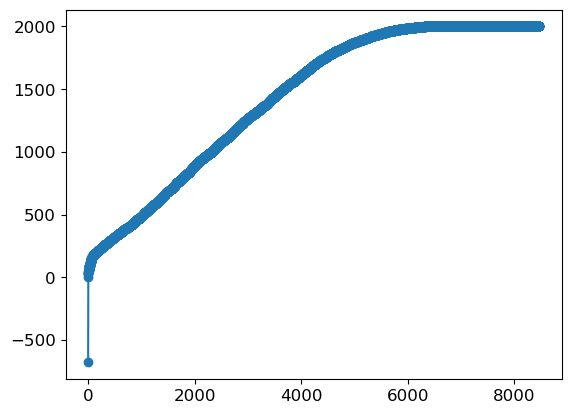

Dew point temperature (C): [-30.6 -30.5 -29.8 ...  26.8  27.2   nan]


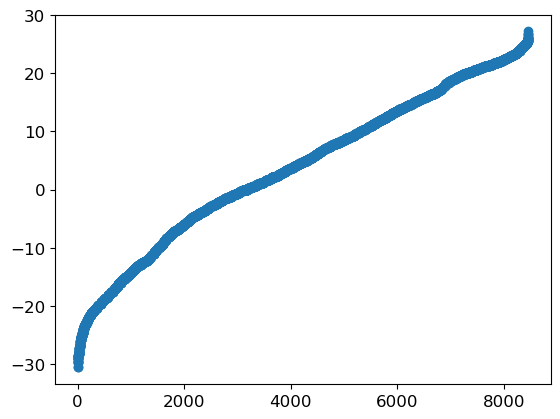

Solar Radiation (MJ/m2): [0.   0.   0.   ... 3.49 3.52 3.52]


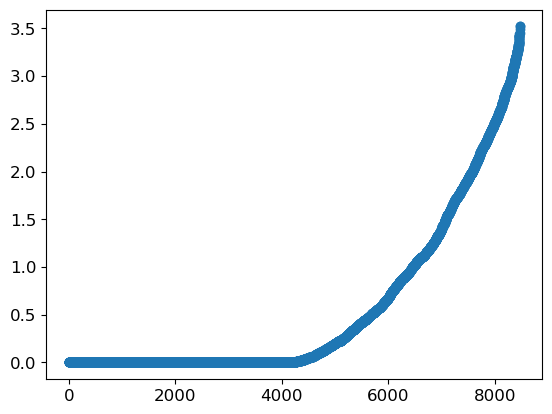

Rainfall(mm): [ 0.  0.  0. ... nan nan nan]


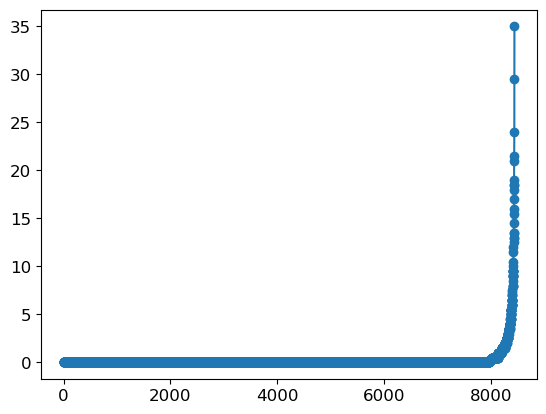

Snowfall (cm): [ 0.  0.  0. ... nan nan nan]


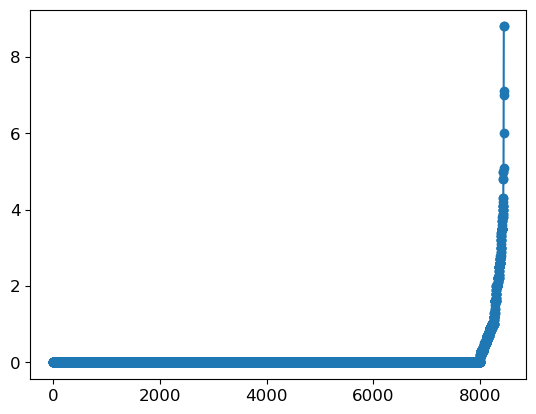

Holiday: [0 0 0 ... 1 1 1]


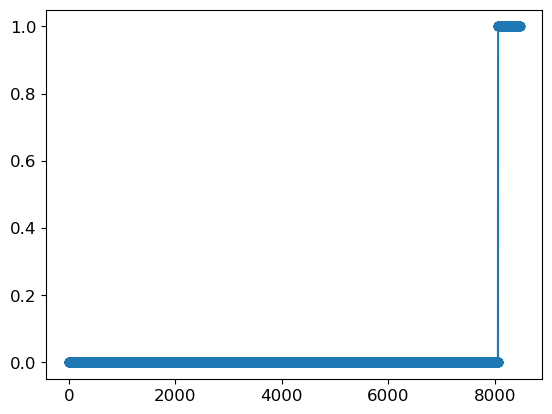

spring: [0 0 0 ... 1 1 1]


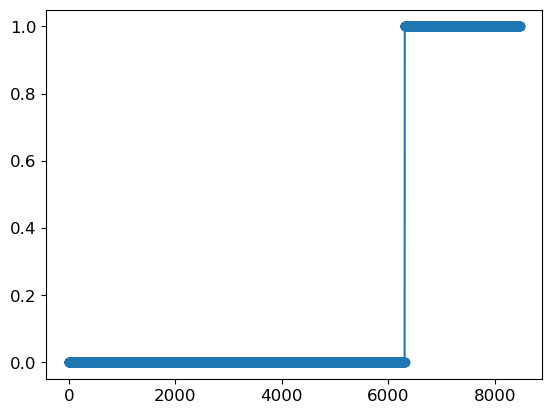

summer: [0 0 0 ... 1 1 1]


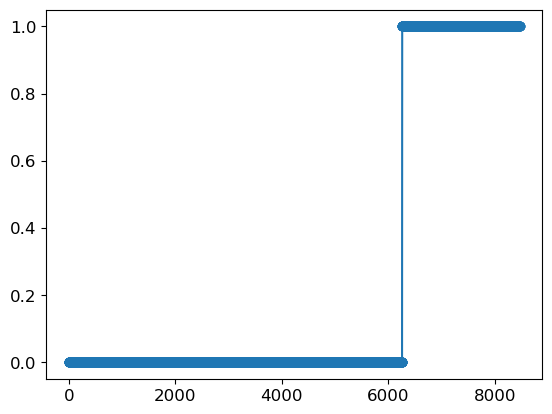

autumn: [0 0 0 ... 1 1 1]


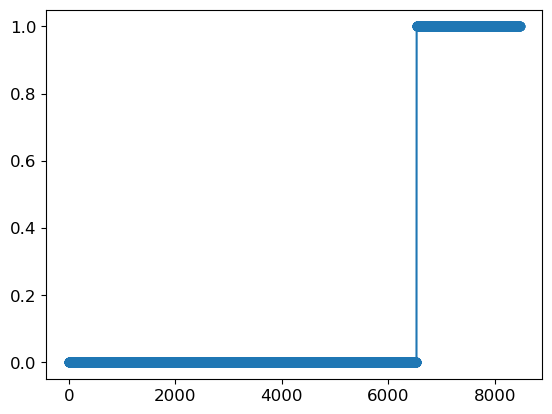

winter: [0 0 0 ... 1 1 1]


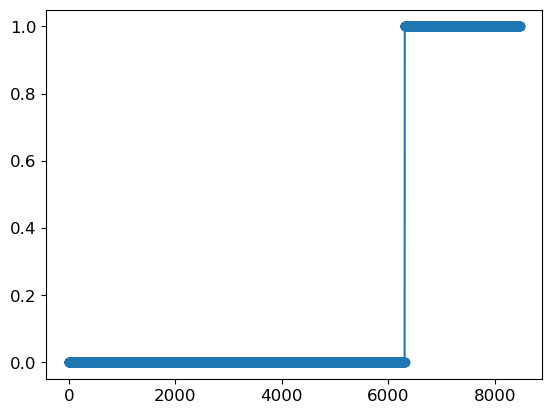

In [17]:
for data in bikedata.columns:
    print(f'{data}: {np.sort(bikedata.loc[:,data])}')
    # We show the sorted values of each feature
    plt.plot(np.sort(bikedata.loc[:,data]),'-o')
    plt.show()

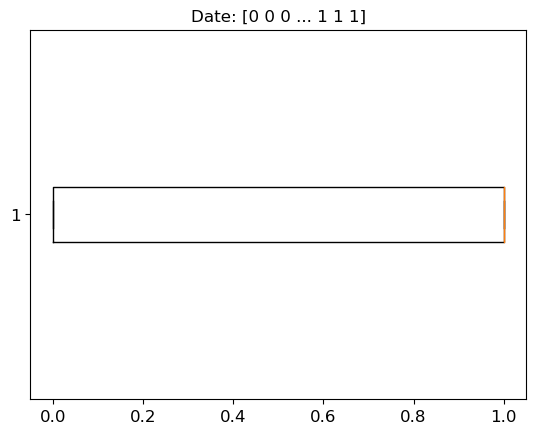

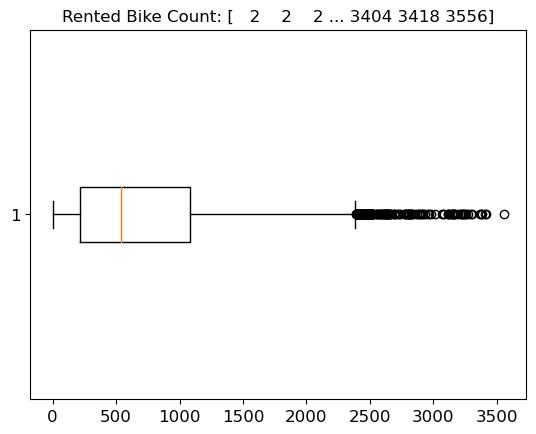

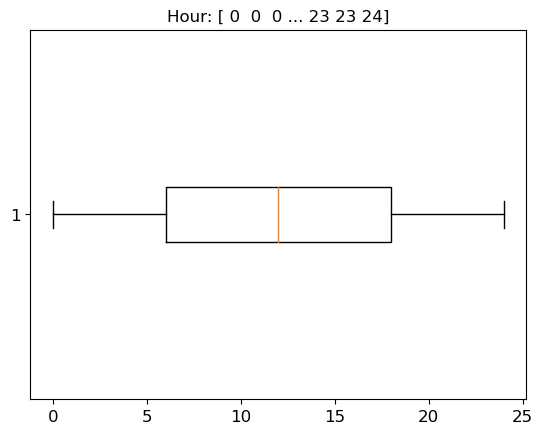

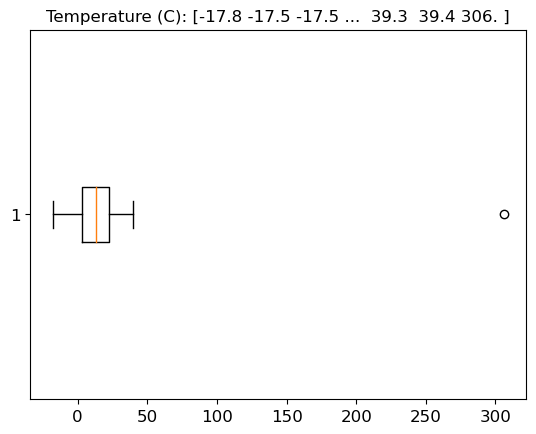

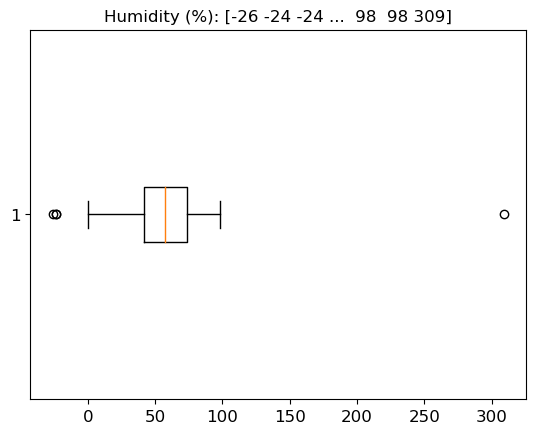

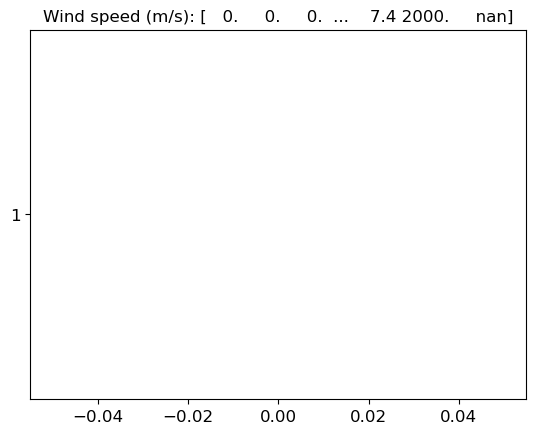

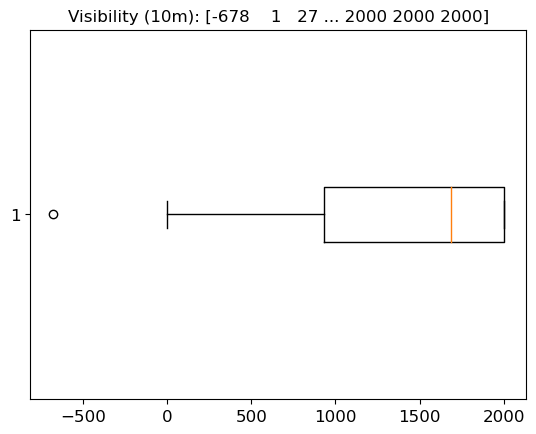

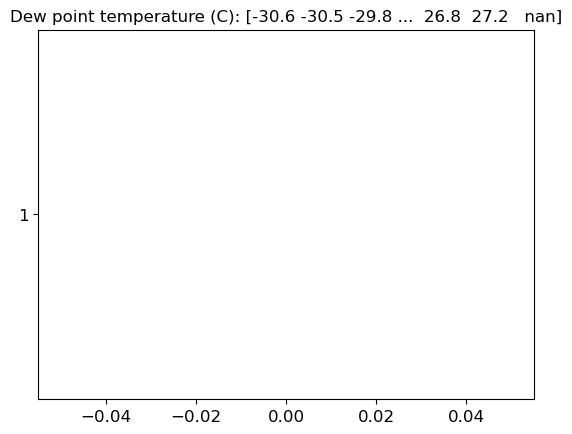

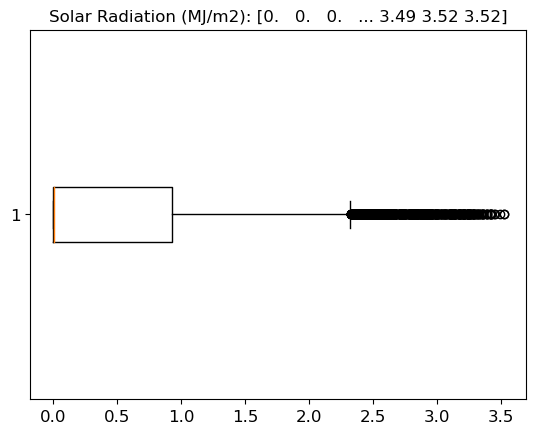

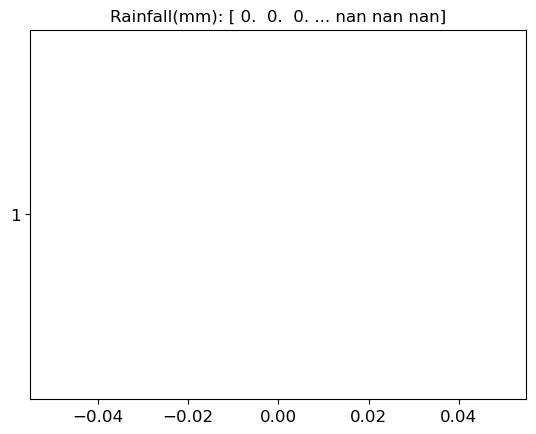

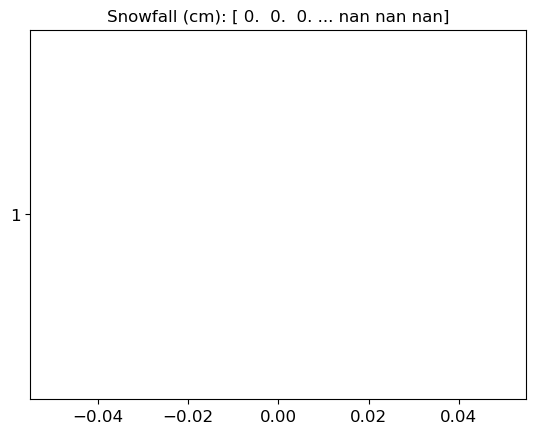

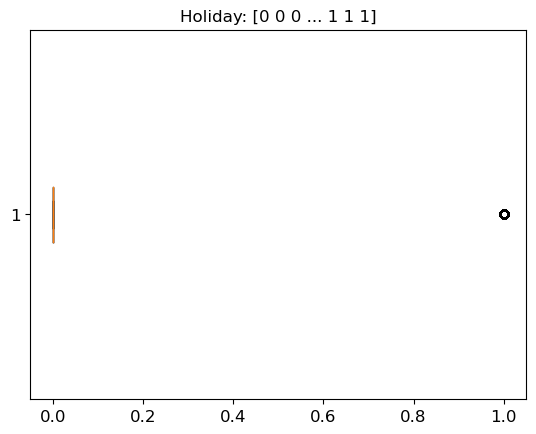

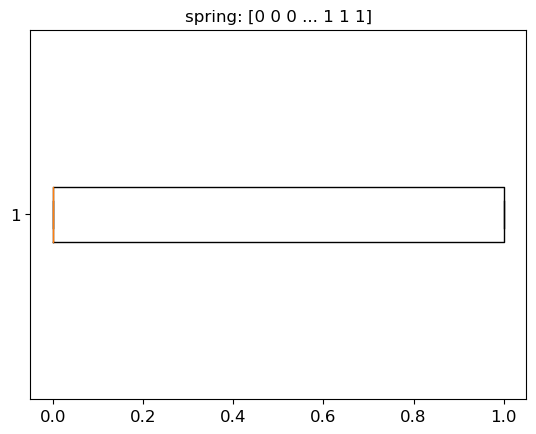

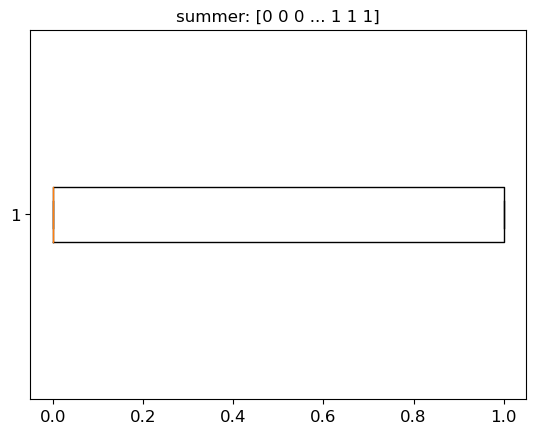

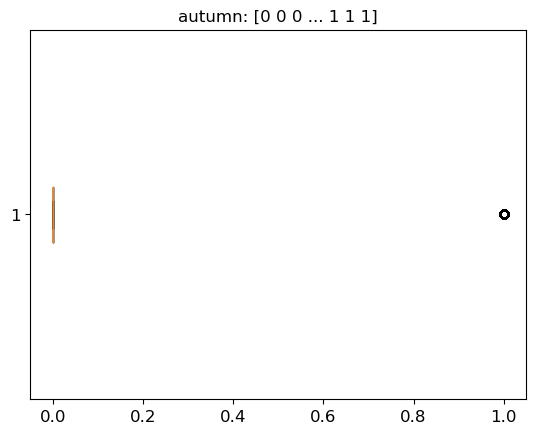

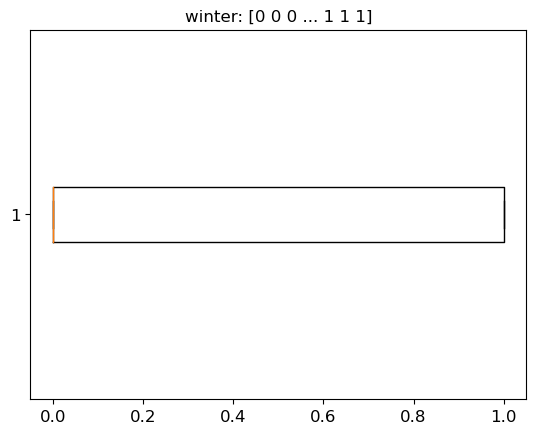

In [18]:
for data in bikedata.columns:
    plt.boxplot(bikedata[data],vert=False)
    plt.title(f'{data}: {np.sort(bikedata.loc[:,data])}')
    plt.show()

In [20]:
### Your summary sentence about problematic entries
#From 3 graphical methods we can see that The contents of the histograms and Line charts seem to be OK, 
#but when the boxplots encounter some columns with NaN values, it cannot display the data in this column.
#So clearly following lines have some numberic issues: Wind speed,Dew point temperature,Rainfall and Snowfall.

### 2.2 Imputation and Pre-Processing

**Set any problematic values** in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

In [19]:
### Your code here
bikedata = bikedata.replace('NaN', np.nan)

In [20]:
print(bikedata.isnull().sum())

Date                          0
Rented Bike Count             0
Hour                          0
Temperature (C)               0
Humidity (%)                  0
Wind speed (m/s)              1
Visibility (10m)              0
Dew point temperature (C)     1
Solar Radiation (MJ/m2)       0
Rainfall(mm)                 25
Snowfall (cm)                23
Holiday                       0
spring                        0
summer                        0
autumn                        0
winter                        0
dtype: int64


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
first_pipeline = Pipeline([("imputer",SimpleImputer(strategy='median')),
                           ('std_scaler',StandardScaler())])

### 2.3 Correlation 

It is also useful to look at how strongly correlated the features are to the desired target (Rented Bike Count). Before anything else is done it is necessary to **fit and apply the pipeline** above to make a *temporary* version of the whole dataset that is pre-processed. **Why is it important to not use this version of the pre-processed data again?**

In [22]:
bikedata_copy=bikedata.copy()
bikedata_copy.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,spring,summer,autumn,winter
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
2,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1
3,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
4,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1


In [23]:
### Your code here
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
bikedata_copy = bikedata.copy()
first_pipeline = Pipeline([("imputer",SimpleImputer(strategy='median'))])
first_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [24]:
dealdata=first_pipeline.fit_transform(bikedata_copy)

In [25]:
num_rows, num_cols = dealdata.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 8465
Number of columns: 16


To visualise the strength of the relationships, display a **scatter plot** for each feature (separately) vs the target variable.  Also **calculate the correlation** of each feature with the target (Hint: pandas function `corr()` or numpy `corrcoef()`). **Which 3 attributes are the most correlated with bike rentals?**

In [26]:
### Your code here
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

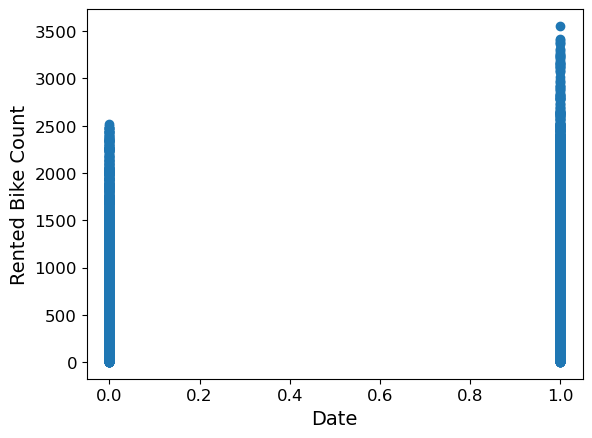

[[1.         0.04635969]
 [0.04635969 1.        ]]


In [27]:
x=dealdata[:,0]
y=dealdata[:,1]
plt.scatter(x, y)
plt.xlabel('Date')
plt.ylabel('Rented Bike Count')
plt.show()
corr0=np.corrcoef(x,y)
print(corr0)

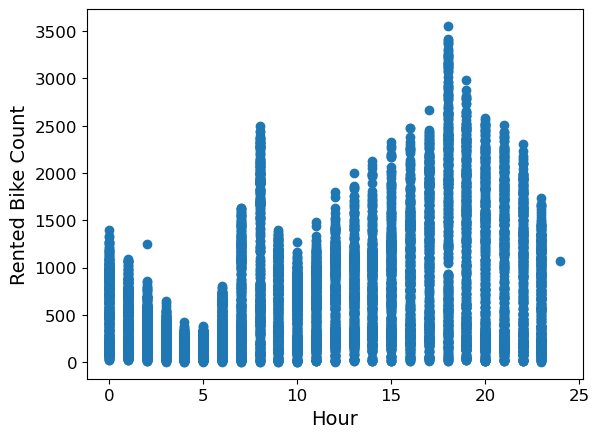

[[1.         0.42545962]
 [0.42545962 1.        ]]


In [28]:
x=dealdata[:,2]
y=dealdata[:,1]
plt.scatter(x, y)
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.show()
corr2=np.corrcoef(x,y)
print(corr2)

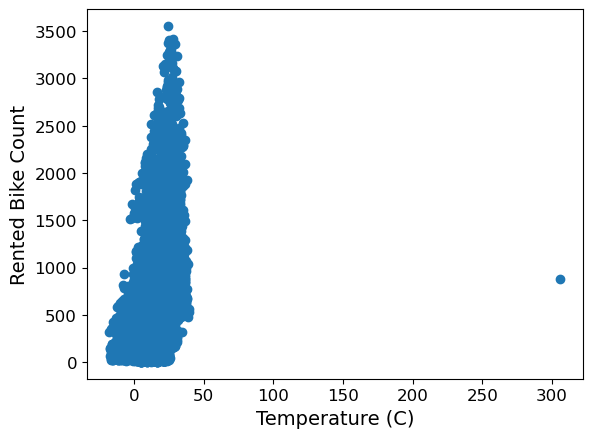

[[1.         0.54485196]
 [0.54485196 1.        ]]


In [29]:
x=dealdata[:,3]
y=dealdata[:,1]
plt.scatter(x, y)
plt.xlabel('Temperature (C)')
plt.ylabel('Rented Bike Count')
plt.show()
corr3=np.corrcoef(x,y)
print(corr3)

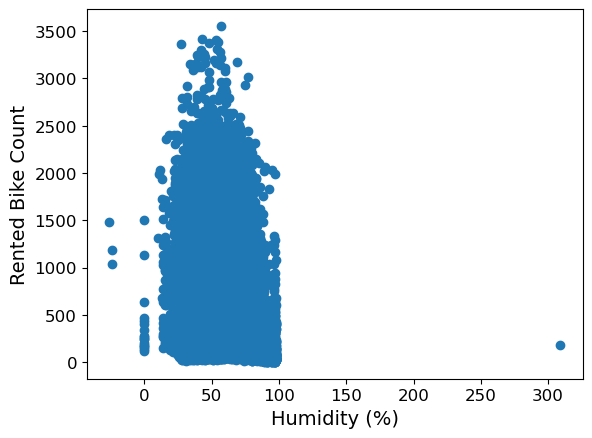

[[ 1.         -0.20171645]
 [-0.20171645  1.        ]]


In [30]:
x=dealdata[:,4]
y=dealdata[:,1]
plt.scatter(x, y)
plt.xlabel('Humidity (%)')
plt.ylabel('Rented Bike Count')
plt.show()
corr4=np.corrcoef(x,y)
print(corr4)

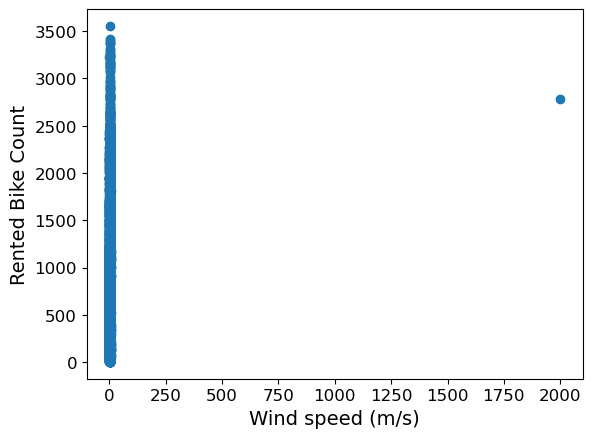

[[1.         0.04074107]
 [0.04074107 1.        ]]


In [31]:
x=dealdata[:,5]
y=dealdata[:,1]
plt.scatter(x, y)
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.show()
corr5=np.corrcoef(x,y)
print(corr5)

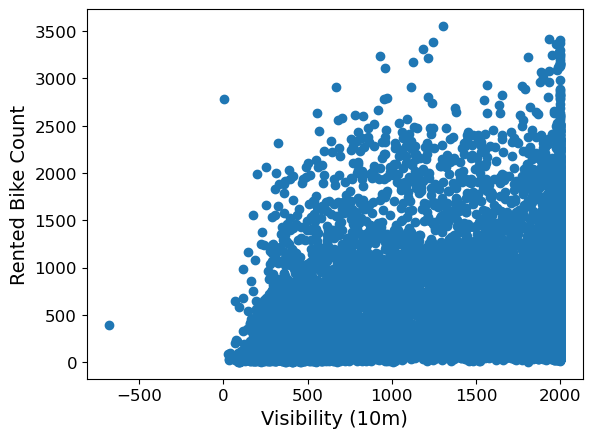

[[1.         0.21102936]
 [0.21102936 1.        ]]


In [32]:
x=dealdata[:,6]
y=dealdata[:,1]
plt.scatter(x, y)
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.show()
corr6=np.corrcoef(x,y)
print(corr6)

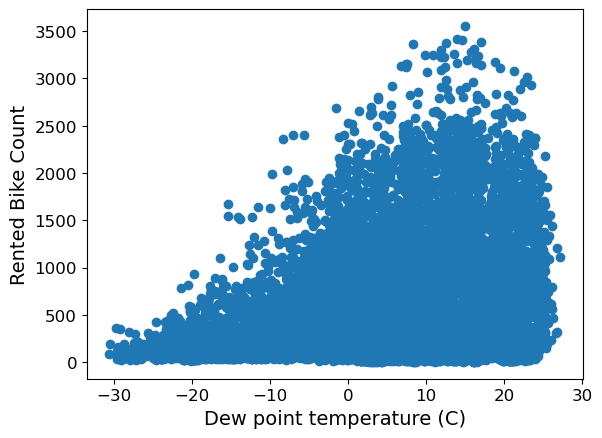

[[1.         0.40023369]
 [0.40023369 1.        ]]


In [33]:
x=dealdata[:,7]
y=dealdata[:,1]
plt.scatter(x, y)
plt.xlabel('Dew point temperature (C)')
plt.ylabel('Rented Bike Count')
plt.show()
corr7=np.corrcoef(x,y)
print(corr7)

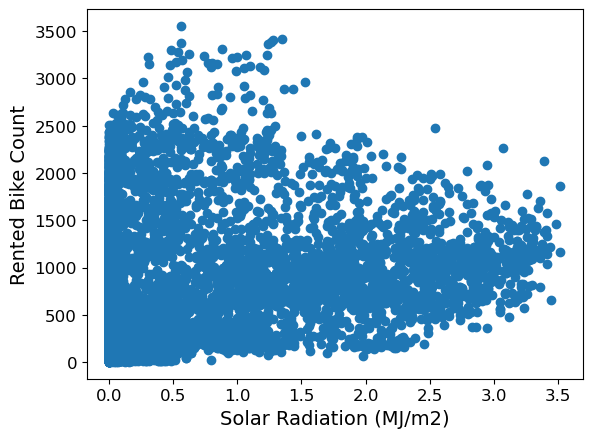

[[1.         0.27386155]
 [0.27386155 1.        ]]


In [34]:
x=dealdata[:,8]
y=dealdata[:,1]
plt.scatter(x, y)
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')
plt.show()
corr8=np.corrcoef(x,y)
print(corr8)

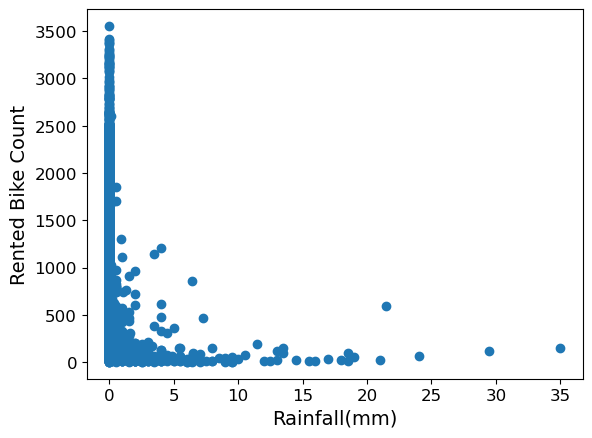

[[ 1.         -0.12862609]
 [-0.12862609  1.        ]]


In [35]:
x=dealdata[:,9]
y=dealdata[:,1]
plt.scatter(x, y)
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')
plt.show()
corr9=np.corrcoef(x,y)
print(corr9)

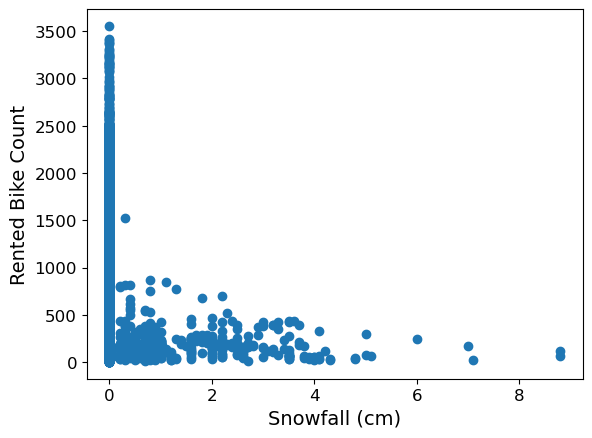

[[ 1.         -0.15161075]
 [-0.15161075  1.        ]]


In [36]:
x=dealdata[:,10]
y=dealdata[:,1]
plt.scatter(x, y)
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented Bike Count')
plt.show()
corr10=np.corrcoef(x,y)
print(corr10)

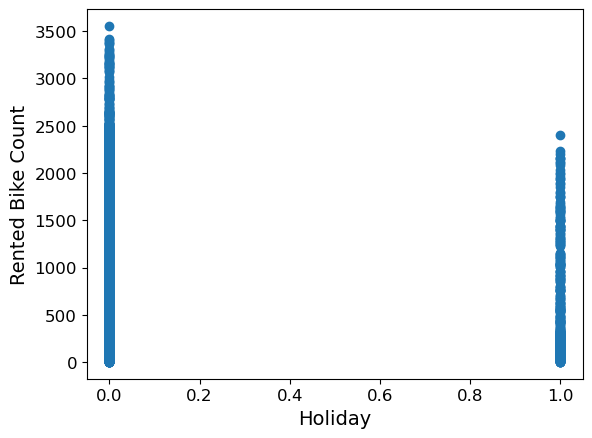

[[ 1.         -0.07007001]
 [-0.07007001  1.        ]]


In [37]:
x=dealdata[:,11]
y=dealdata[:,1]
plt.scatter(x, y)
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.show()
corr11=np.corrcoef(x,y)
print(corr11)

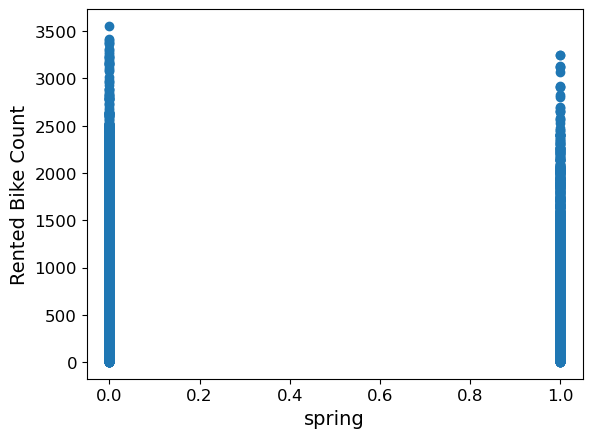

[[1.         0.01557979]
 [0.01557979 1.        ]]


In [38]:
x=dealdata[:,12]
y=dealdata[:,1]
plt.scatter(x, y)
plt.xlabel('spring')
plt.ylabel('Rented Bike Count')
plt.show()
corr12=np.corrcoef(x,y)
print(corr12)

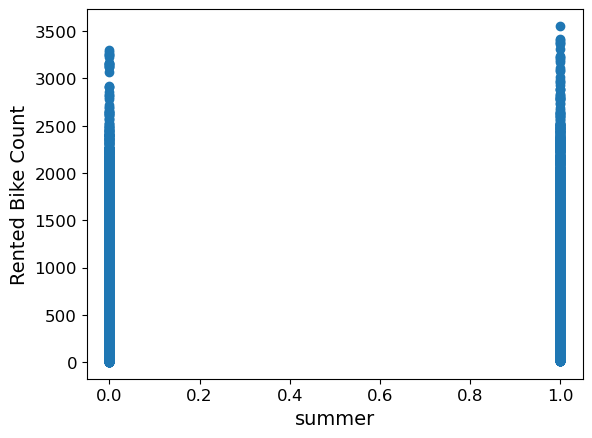

[[1.        0.2820008]
 [0.2820008 1.       ]]


In [39]:
x=dealdata[:,13]
y=dealdata[:,1]
plt.scatter(x, y)
plt.xlabel('summer')
plt.ylabel('Rented Bike Count')
plt.show()
corr13=np.corrcoef(x,y)
print(corr13)

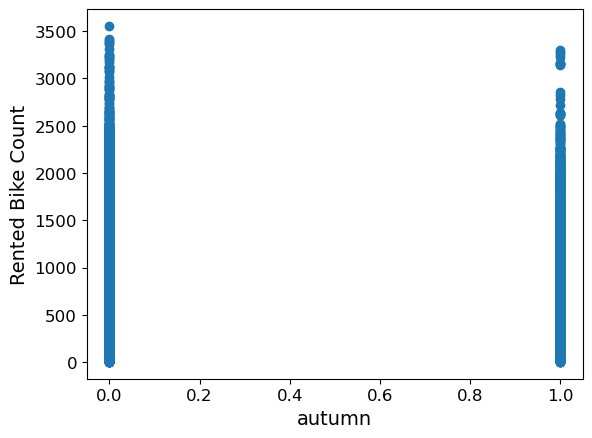

[[1.         0.16533274]
 [0.16533274 1.        ]]


In [40]:
x=dealdata[:,14]
y=dealdata[:,1]
plt.scatter(x, y)
plt.xlabel('autumn')
plt.ylabel('Rented Bike Count')
plt.show()
corr14=np.corrcoef(x,y)
print(corr14)

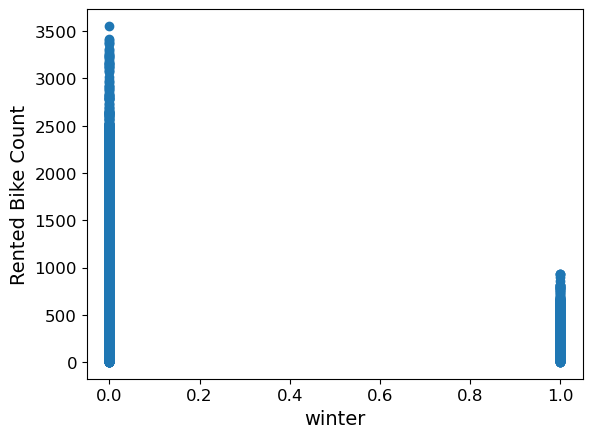

[[ 1.         -0.45891982]
 [-0.45891982  1.        ]]


In [41]:
x=dealdata[:,15]
y=dealdata[:,1]
plt.scatter(x, y)
plt.xlabel('winter')
plt.ylabel('Rented Bike Count')
plt.show()
corr15=np.corrcoef(x,y)
print(corr15)

In [42]:
### Your written answers here
#We measure the correlation number with its absolute value.According to the correlation coeffients, 
#temperature,hours and if it's winter are top 3 factors that determins if people will rent bikes.
#The reasion why we should use this dataset to process the data is that if we use the processed data again,the actions we took like
#scaling data and median interpolation may varies and make the data generate errors,also if we use the same data to evalutlate our model
#the consequence may be to optimistic which means mislead our accessment.

## Step 3: Predicting bike rentals (25%)

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (rmse) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Build a pipeline** starting with the one specified in section 2.2 above, and now include a ***linear regression* model**. After you've done this, **fit** this to your training data for a quick test. To get an idea of how successful this model is, **calculate the rmse of the fit to the training data**. To act as a simple baseline for comparison, **also calculate the rmse** that you would get if all the predictions were equal to the **mean of the training targets** (i.e. bike rentals).


In [43]:
### Your code here
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bikedata, test_size=0.2, random_state=19)

In [44]:
training_features = train_set.drop(["Rented Bike Count"], axis=1) 
training_labels = train_set["Rented Bike Count"].copy() 

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
second_pipeline = Pipeline([("imputer",SimpleImputer(strategy='median')),
                           ("linear_regression", LinearRegression())])
second_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('linear_regression', LinearRegression())])

In [46]:
realdata=second_pipeline.fit(training_features,training_labels)
prediction_lr = realdata.predict(training_features)

In [47]:
from sklearn.metrics import mean_squared_error
msetrue = mean_squared_error(training_labels,prediction_lr)
rmsetrue = mean_squared_error(training_labels,prediction_lr,squared = False) 
print(msetrue)
print(rmsetrue)

191894.38534771677
438.0575137441621


In [48]:
meanlabel=np.mean(training_labels)
meanarray = np.full_like(training_labels, meanlabel)
msecontrast = mean_squared_error(training_labels,meanarray)
rmsecontrast = mean_squared_error(training_labels,meanarray,squared = False) 
print(msecontrast)
print(rmsecontrast)#this is mean number of laber to make a comparision with the model.

415188.5536030715
644.3512656952506


Show an appropriate **visualisation of the fit for your linear regression.**

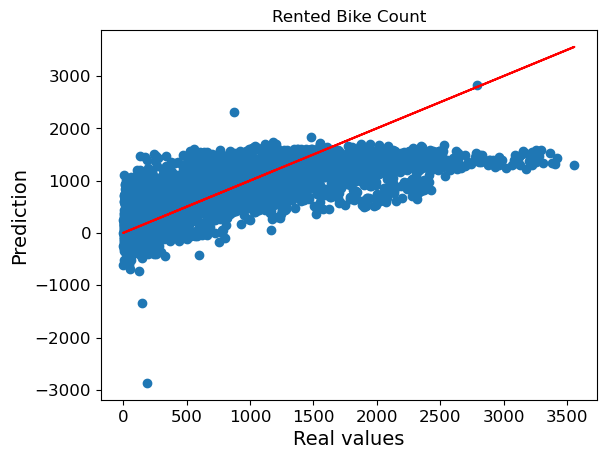

In [49]:
### Your code here
plt.scatter(training_labels,prediction_lr)
plt.plot(training_labels,training_labels,'r')
plt.title("Rented Bike Count")
plt.xlabel("Real values")
plt.ylabel("Prediction")
plt.show()

Now two other, different regression models (that you probably won't be familiar with) will be fit and later these will be compared to find the best one.

The second model to fit is ***Kernel Ridge*** regression (`from sklearn.kernel_ridge import KernelRidge`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

In [50]:
### Your code here
from sklearn.kernel_ridge import KernelRidge
third_pipeline = Pipeline([("imputer",SimpleImputer(strategy='median')),
                           ("Kernel_Ridge_regression",KernelRidge())])
realdata1=third_pipeline.fit(training_features,training_labels)
prediction_lr1 = realdata1.predict(training_features)
msetrue1 = mean_squared_error(training_labels,prediction_lr1)
rmsetrue1 = mean_squared_error(training_labels,prediction_lr1,squared = False) 
print(msetrue1)
print(rmsetrue1)

191921.83943340657
438.0888487891544


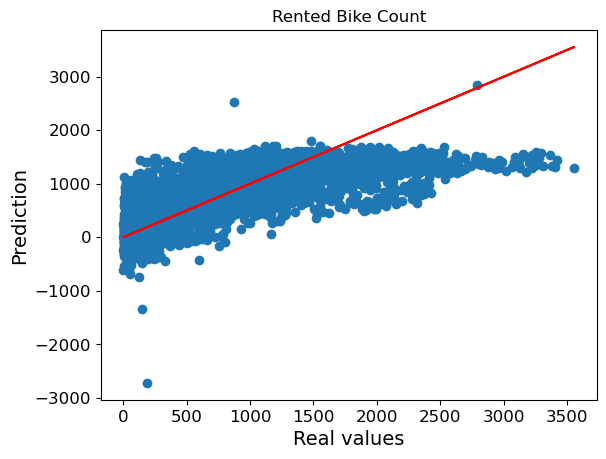

In [51]:
plt.scatter(training_labels,prediction_lr1)
plt.plot(training_labels,training_labels,'r')
plt.title("Rented Bike Count")
plt.xlabel("Real values")
plt.ylabel("Prediction")
plt.show()

The third, and most powerful model, is ***Support Vector Regression*** (`from sklearn.svm import SVR`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

In [52]:
### Your code here
from sklearn.svm import SVR
fourth_pipeline = Pipeline([("imputer",SimpleImputer(strategy='median')),
                           ("Support_Vector_Regression ",SVR())])
realdata2=fourth_pipeline.fit(training_features,training_labels)
prediction_lr2 = realdata2.predict(training_features)
msetrue2 = mean_squared_error(training_labels,prediction_lr2)
rmsetrue2 = mean_squared_error(training_labels,prediction_lr2,squared = False) 
print(msetrue2)
print(rmsetrue2)

428779.18276599766
654.8123263699284


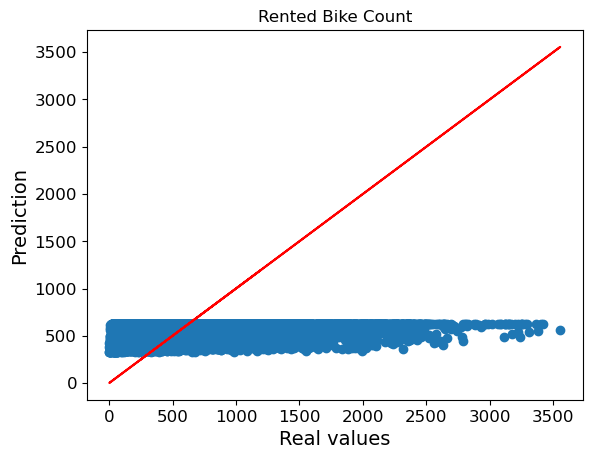

In [53]:
plt.scatter(training_labels,prediction_lr2)
plt.plot(training_labels,training_labels,'r')
plt.title("Rented Bike Count")
plt.xlabel("Real values")
plt.ylabel("Prediction")
plt.show()

## Step 4: Cross validation (20%)

**Perform a *10 fold cross validation* for each model.** This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run.

**Display the mean and standard deviation of the rmse values** obtained for each model **for the validation splits** using the same settings/parameters for the models as used above. **Also display the mean and standard deviation** of the rmse values obtained for the **training data splits**.

In [54]:
### Your code here
from sklearn.model_selection import cross_validate
cv_results1 = cross_validate(realdata, training_features, training_labels, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True)
mean_train_rmse1 = np.mean(-cv_results1['train_score'])
std_train_rmse1 = np.std(-cv_results1['train_score'])
mean_val_rmse1 = np.mean(-cv_results1['test_score'])
std_val_rmse1 = np.std(-cv_results1['test_score'])
print('rmse for LinearRegression validation: ', mean_val_rmse1)
print('standard deviation for LinearRegression validation: ',std_val_rmse1)
print('rmse for LinearRegression training: ', mean_train_rmse1)
print('standard deviation for LinearRegression training: ',std_train_rmse1)

rmse for LinearRegression validation:  537.4509649118904
standard deviation for LinearRegression validation:  266.74735865702775
rmse for LinearRegression training:  437.7735515599905
standard deviation for LinearRegression training:  2.0784134268901986


In [55]:
cv_results2 = cross_validate(realdata1, training_features, training_labels, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True)
mean_train_rmse2 = np.mean(-cv_results2['train_score'])
std_train_rmse2 = np.std(-cv_results2['train_score'])
mean_val_rmse2 = np.mean(-cv_results2['test_score'])
std_val_rmse2 = np.std(-cv_results2['test_score'])
print('rmse for KernelRidge validation: ', mean_val_rmse2)
print('standard deviation for KernelRidge validation: ',std_val_rmse2)
print('rmse for KernelRidge training: ', mean_train_rmse2)
print('standard deviation for KernelRidge training: ',std_train_rmse2)

rmse for KernelRidge validation:  542.1509481868136
standard deviation for KernelRidge validation:  277.3625537152472
rmse for KernelRidge training:  437.80968408332683
standard deviation for KernelRidge training:  2.0789608778043296


In [56]:
cv_results3 = cross_validate(realdata2, training_features, training_labels, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True)
mean_train_rmse3 = np.mean(-cv_results3['train_score'])
std_train_rmse3 = np.std(-cv_results3['train_score'])
mean_val_rmse3 = np.mean(-cv_results3['test_score'])
std_val_rmse3 = np.std(-cv_results3['test_score'])
print('rmse for SVM validation: ', mean_val_rmse3)
print('standard deviation for SVM validation: ',std_val_rmse3)
print('rmse for SVM training: ', mean_train_rmse3)
print('standard deviation for SVM training: ',std_train_rmse3)

rmse for SVM validation:  655.4605839040953
standard deviation for SVM validation:  22.903026025737116
rmse for SVM training:  655.6964308230655
standard deviation for SVM training:  2.196909598521679


On the basis of the results you found above, would you say that any of the models were **under-fitting or over-fitting**?  

**Which method do you think is the best** out of these three?

In [61]:
### Your answer here
#From the data, it can be seen that there is no overfitting or underfitting of the model. The training set RMSE of the 
#three models are fairly equal and very small,which means they were trained by training set properly.While the RMSE of training set of 
#first 2 models are smaller than that of their validation sets,which is normal.The SVM model has nearly same RMSE for training set and 
#validaion set.

#For linear regression algorithms, the mean RMSE of the validation set is slightly higher than that of the training 
#set, and the standard deviation is much larger than that of the training set,which means the output differs lagerly in 
#validation set,letting us know the data is unstable when testing it.

#For the KernelRidge algorithm, all indicators are close to the linear regression model.

#For the SVM algorithm, the RMSE of the validation set and training set is close, but both are higher than the 
#linear regression algorithm and the KernelRidge algorithm, indicating that the accuracy of the SVM algorithm 
#on the training set and validation set is not as good as the first two models. However, the standard deviation 
#of the SVM algorithm on validation set is much lower than the first two models, indicating that the performance 
#of the SVM model in different training sets is very stable.

#In summary, choosing the third algorithm, SVM algorithm, is more reasonable because its data stability is 
#much better than the first two algorithms when it comes to validation set--or our test set, and the error 
#is slightly greater than the first two algorithms, which is acceptable

## Step 5: Grid parameter search (15%)

Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. **Choose either the KernelRidge or SVR** (your choice entirely), and use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function `GridSearchCV` to do this. 

For KernelRidge, vary the hyperparameter `alpha`.

For SVR, vary the hyperparameter `C`.

**Print out the hyperparameter setting** for the best (i.e. chosen) method. 

Finally, **train and apply your chosen method**, with appropriate hyperparameter settings, to the ***test set* and report the performance**. 

In [57]:
### Your code here
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
SVR1 = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("svr", SVR())
])
parameters = {'svr__C': [ 10,25,30.50,100,100,500,1000,2000,5000,10000,15000,20000,50000]}
clf = GridSearchCV(SVR1, parameters,scoring= 'neg_root_mean_squared_error', cv=10)
clf.fit(training_features, training_labels)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [10, 25, 30.5, 100, 100, 500, 1000, 2000,
                                    5000, 10000, 15000, 20000, 50000]},
             scoring='neg_root_mean_squared_error')

In [58]:
print(clf.best_params_)
print(-clf.best_score_)

{'svr__C': 50000}
465.24052491500834


In [59]:
SVR2 = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("svr", SVR())
])
SVR2.set_params(**clf.best_params_)
SVR2.fit(training_features, training_labels) 
predictbest = SVR2.predict(training_features)

In [60]:
msetruetrain = mean_squared_error(training_labels,predictbest)
rmsetruetrain= mean_squared_error(training_labels,predictbest,squared = False) 
print(rmsetruetrain)#training score

458.27176611078755


In [61]:
test_features = test_set.drop(["Rented Bike Count"], axis=1) 
test_labels = test_set["Rented Bike Count"].copy() 
test_predictions = SVR2.predict(test_features)

In [62]:
msetruevalidation = mean_squared_error(test_labels,test_predictions)
rmsetruevalidation= mean_squared_error(test_labels,test_predictions,squared = False) 
print(rmsetruevalidation)#testing score

447.0027384367937


In [63]:
cv_results = clf.cv_results_
mean_rmse_vali = np.mean(-cv_results['mean_test_score'])
print(mean_rmse_vali)#validation score

542.5243609872339


**How different was the test set performance to the validation performance, and is this suggestive of over-fitting, under-fitting or neither?**

In [147]:
### Your answers here
#When we compare with the SVM method without using GridSearch,we can see all RMSE including training set,validation set and test 
#set decrease a lot,which means chaning the parameter of SVM really help us increase the model significantly.However,We can see 
#the RMSE of training set and test set is fairly close but both of them are smaller than the RMSE of validation set,which means we
#may have some over-fitting problem that causes validation set behave worse than other two sets.